<a href="https://colab.research.google.com/github/anhtv26062000/Steganography-Multimedia/blob/master/Harris_Corner_Detector__OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import 2 thư viện Numpy và OpenCV

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Đọc ảnh và chuyển từ ảnh màu sang ảnh mức xám.
 
Yêu cầu input của hàm cv2.cornerHarris() là ảnh bức xám và kiểu dữ liệu là float32. 

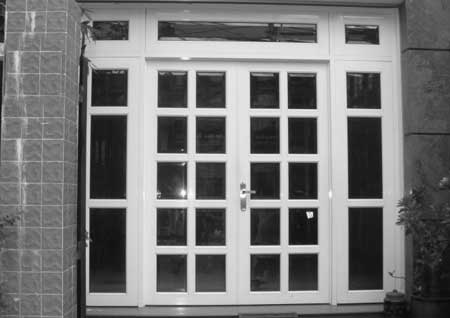

In [ ]:
filename = 'test2_img.jpg'
img = cv2.imread(filename)
gray_img = np.float32(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
cv2_imshow(gray_img)

Hàm cv2.cornerHarris() có 4 tham số đầu vào:
* img: ảnh input đầu vào - nên là ảnh mức xám và dạng float32
* blockSize: size xung quanh điểm mà mình  xem xét
* ksize: Aperture parameter of Sobel derivative used.
* k: Harris detector free parameter in the equation.

Output của hàm cv2.cornerHarris() là ma trận của ảnh mức xám chứa các point được dectect là corner

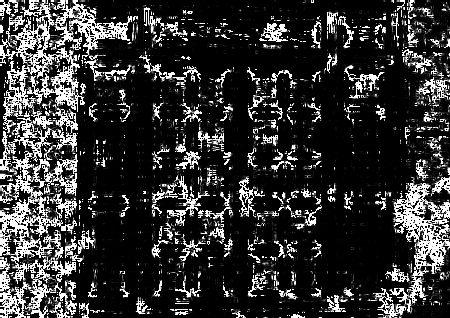

In [ ]:
dst = cv2.cornerHarris(gray_img, 2, 3, 0.04)
cv2_imshow(dst)

Đặt ngưỡng (threshold) và chọn những point có giá trị lớn hơn hoặc bằng ngưỡng.

Các chấm đỏ là tập hợp các point có giá trị lớn hơn hoặc bằng ngưỡng.

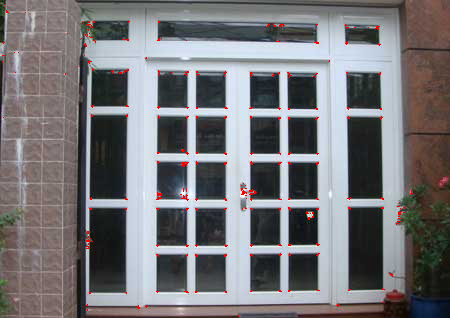

In [ ]:
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)

Tìm ra point có độ chính xác cao nhất (màu xanh) so với tập hợp các point màu đỏ.

OpenCV có hàm hỗ trợ là hàm cv2.cornerSubPix() với ý tưởng là tìm trọng tâm của tập hợp các point màu đỏ.

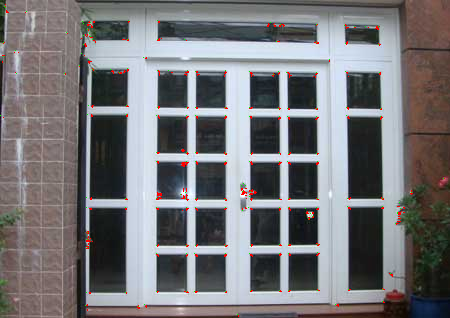

In [ ]:
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray_img, np.float32(centroids), (5,5), (-1,-1), criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite(filename,img)
cv2_imshow(img)